# 1. Các thư viện được sử dụng

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.graph_objs as go

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from plotly.offline import iplot

# 2. Load các tập dataset

In [2]:
# Đường dẫn tới thư mục chứa các dataset
data_dir = 'data'

# Lấy danh sách các tệp CSV trong thư mục
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Đếm số lượng tệp CSV
num_files = len(csv_files)

print(f"Số lượng tệp CSV trong thư mục 'data': {num_files}")

Số lượng tệp CSV trong thư mục 'data': 8


In [3]:
df15_raw = pd.read_csv('./data/2015.csv')
df16_raw = pd.read_csv('./data/2016.csv')
df17_raw = pd.read_csv('./data/2017.csv')
df18_raw = pd.read_csv('./data/2018.csv')
df19_raw = pd.read_csv('./data/2019.csv')
df20_raw = pd.read_csv('./data/2020.csv')
df21_raw = pd.read_csv('./data/2021.csv')
df22_raw = pd.read_csv('./data/2022.csv')

In [4]:
display(df15_raw.head(5))

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
display(df16_raw.head(5))

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
display(df17_raw.head(5))

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
display(df18_raw.head(5))

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [8]:
display(df19_raw.head(5))

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
display(df20_raw.head(5))

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [10]:
display(df21_raw.head(5))

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [11]:
display(df22_raw.head(5))

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


# 3. Tiền xử lý dữ liệu

## 3.1. Tiến hành tích hợp tất cả các tập dữ liệu

### 3.1.1. Kiểm tra các cột ở tất cả các tập dataset

In [12]:
df15_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [13]:
df16_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [14]:
df17_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [15]:
df18_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [16]:
df19_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [17]:
df20_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [18]:
df21_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [19]:
df22_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

- Có thể thấy rằng, chỉ duy nhất tập dataset 2022.csv là các cột thuộc tính đều là dạng object, tiến hành xử lý các cột này để dễ dàng tích hợp dữ liệu

In [20]:
display(df22_raw.head(3))

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"


In [21]:
# Chuẩn hóa các giá trị trong các cột từ object về float64 và thay thế dấu ',' bằng dấu '.'
for column in df22_raw.columns:
    if column not in ["RANK", "Country"]:
        df22_raw[column] = df22_raw[column].str.replace(',', '.').astype('float64')

In [22]:
df22_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [23]:
display(df22_raw.head(3))

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191


### 3.1.2. Trích lọc các cột cần thiết ở các tập dataset

In [24]:
df15_raw['year']=2015

d15=df15_raw[['Country', 'Happiness Score',
            'Economy (GDP per Capita)', 'Family',
            'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
            'Generosity','year']]

In [25]:
df16_raw['year']=2016

d16=df16_raw[['Country', 'Happiness Score',
            'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
            'Freedom', 'Trust (Government Corruption)', 'Generosity','year']]

In [26]:
df17_raw['year']=2017

d17=df17_raw[['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
            'Health..Life.Expectancy.', 'Freedom',
            'Trust..Government.Corruption.','Generosity','year']]

In [27]:
df18_raw['year']=2018

d18=df18_raw[['Country or region', 'Score', 'GDP per capita',
            'Social support', 'Healthy life expectancy',
            'Freedom to make life choices','Perceptions of corruption', 'Generosity','year']]

In [28]:
df19_raw['year']=2019

d19=df19_raw[[ 'Country or region', 'Score', 'GDP per capita',
            'Social support', 'Healthy life expectancy',
            'Freedom to make life choices','Perceptions of corruption', 'Generosity','year']]

In [29]:
df20_raw['year']=2020

d20=df20_raw[['Country name', 'Ladder score','Explained by: Log GDP per capita', 'Explained by: Social support',
              'Explained by: Healthy life expectancy',
              'Explained by: Freedom to make life choices','Explained by: Perceptions of corruption',
              'Explained by: Generosity','year' ]]

In [30]:
df21_raw['year']=2021

d21 = df21_raw[['Country name', 'Ladder score', 'Explained by: Log GDP per capita',
                'Explained by: Social support', 'Explained by: Healthy life expectancy',
                'Explained by: Freedom to make life choices', 'Explained by: Perceptions of corruption',
                'Explained by: Generosity', 'year']]

In [31]:
df22_raw['year']=2022

d22 = df22_raw[['Country', 'Happiness score', 'Explained by: GDP per capita',
                'Explained by: Social support', 'Explained by: Healthy life expectancy',
                'Explained by: Freedom to make life choices', 'Explained by: Perceptions of corruption',
                'Explained by: Generosity', 'year']]

### 3.1.3. Thay đổi tên các cột để thống nhất trên tập dữ liệu

In [32]:
def rename_columns_to_match(df_to_rename, reference_df):
    ref_columns = reference_df.columns
    target_columns = df_to_rename.columns
    renamed_columns = {target: ref for ref, target in zip(ref_columns, target_columns)}
    return df_to_rename.rename(columns=renamed_columns)

In [33]:
d17 = rename_columns_to_match(d17, d15)
d18 = rename_columns_to_match(d18, d15)
d19 = rename_columns_to_match(d19, d15)
d20 = rename_columns_to_match(d20, d15)
d21 = rename_columns_to_match(d21, d15)
d22 = rename_columns_to_match(d22, d15)

### 3.1.4. Tích hợp dữ liệu

In [34]:
df_raw = pd.concat([d15,d16,d17,d18,d19,d20, d21, d22],axis=0)

In [35]:
display(df_raw.head(5))

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [36]:
display(df_raw.tail(5))

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
142,Rwanda*,3.268,0.785,0.133,0.462,0.621,0.544,0.187,2022
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.105,0.106,2022
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.034,0.082,2022
145,Afghanistan,2.404,0.758,0.000,0.289,0.000,0.005,0.089,2022
146,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


## 3.2. Xử lý dữ liệu bị thiếu

In [37]:
print("Số dòng x cột của tập dataframe hiện tại:")
display(df_raw.shape)

# Đếm số lượng dòng dữ liệu có cột bị NULL hoặc rỗng
num_rows_with_null = len(df_raw[df_raw.isnull().any(axis=1)])

print(f"Số lượng dòng dữ liệu có cột bị NULL hoặc rỗng: {num_rows_with_null}")


Số dòng x cột của tập dataframe hiện tại:


(1231, 9)

Số lượng dòng dữ liệu có cột bị NULL hoặc rỗng: 2


- Số lượng dòng dữ liệu bị thiếu sau khi tích hợp dữ liệu là không đáng kể, có thể loại bỏ dòng này

In [38]:
# Loại bỏ các dòng dữ liệu có cột bị NULL hoặc rỗng
df_cleaned = df_raw.dropna()

# Kiểm tra số lượng dòng dữ liệu sau khi loại bỏ
num_rows_after_cleaning = len(df_cleaned)

print(f"Số lượng dòng dữ liệu sau khi loại bỏ: {num_rows_after_cleaning}")

Số lượng dòng dữ liệu sau khi loại bỏ: 1229


## 3.3. Xử lý dữ liệu trùng lặp

In [39]:
# Kiểm tra và xem các dòng trùng lặp trong DataFrame
duplicate_rows = df_cleaned[df_cleaned.duplicated()]

# Hiển thị các dòng trùng lặp
print("Các dòng trùng lặp trong DataFrame:")
print(duplicate_rows)


Các dòng trùng lặp trong DataFrame:
Empty DataFrame
Columns: [Country, Happiness Score, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, year]
Index: []


In [40]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,1229.0,5.428998,1.115155,2.404,4.584,5.410000,6.223000,7.842000
Economy (GDP per Capita),1229.0,0.975343,0.434249,0.000,0.668,1.012160,1.295843,2.209000
Family,1229.0,1.033193,0.329578,0.000,0.828,1.069336,1.273850,1.644000
Health (Life Expectancy),1229.0,0.608082,0.241340,0.000,0.439,0.639333,0.790810,1.141000
Freedom,1229.0,0.440960,0.154412,0.000,0.345,0.459000,0.559000,0.740000
Trust (Government Corruption),1229.0,0.130756,0.110818,0.000,0.056,0.096000,0.164000,0.587000
Generosity,1229.0,0.201595,0.115568,0.000,0.118,0.187000,0.258538,0.838075
year,1229.0,2018.447518,2.283610,2015.000,2016.000,2018.000000,2020.000000,2022.000000


## 3.4. Xử lý dữ liệu bị nhiễu trong tập dữ liệu

In [41]:
def plot_histogram(df, column_name, bins=10):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_name].dropna(), bins=bins, edgecolor='k')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

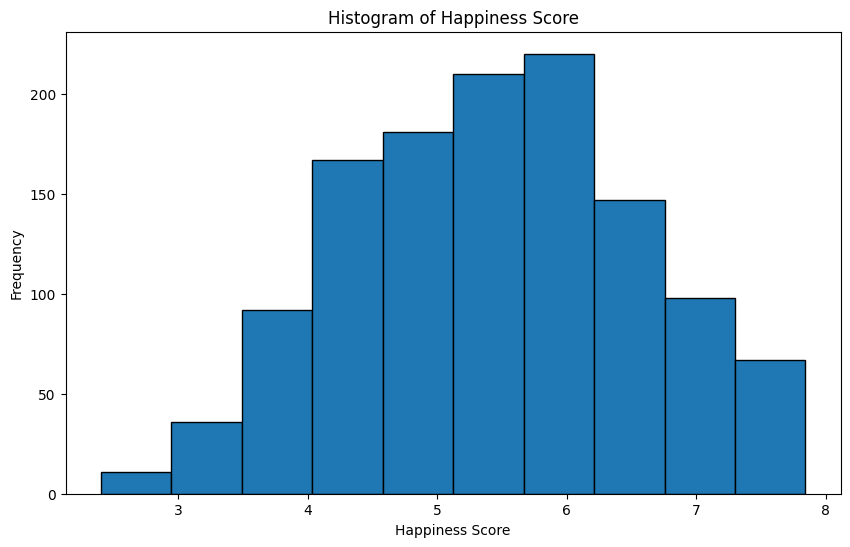

In [42]:
plot_histogram(df_cleaned, 'Happiness Score')

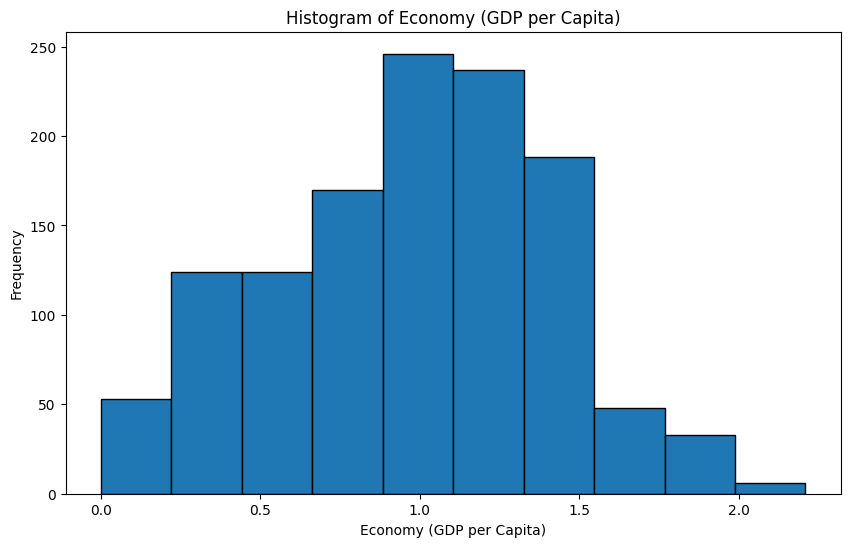

In [43]:
plot_histogram(df_cleaned, 'Economy (GDP per Capita)')

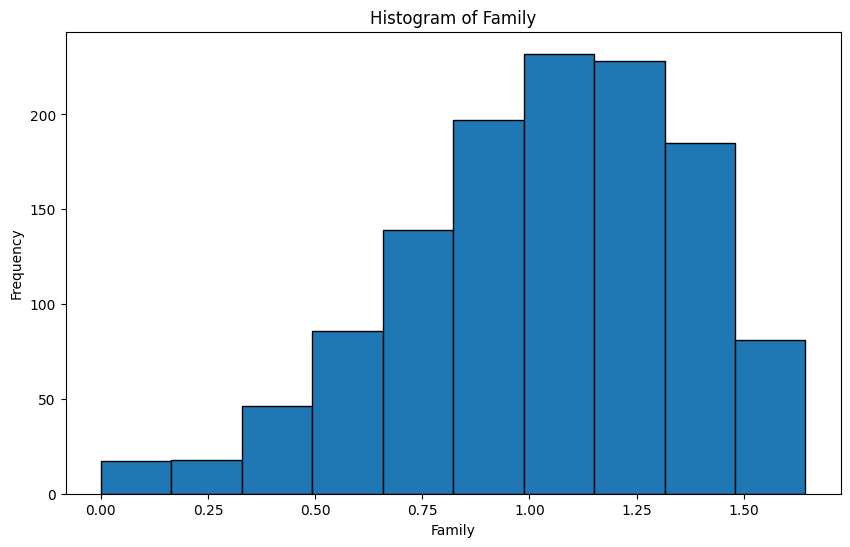

In [44]:
plot_histogram(df_cleaned, 'Family')

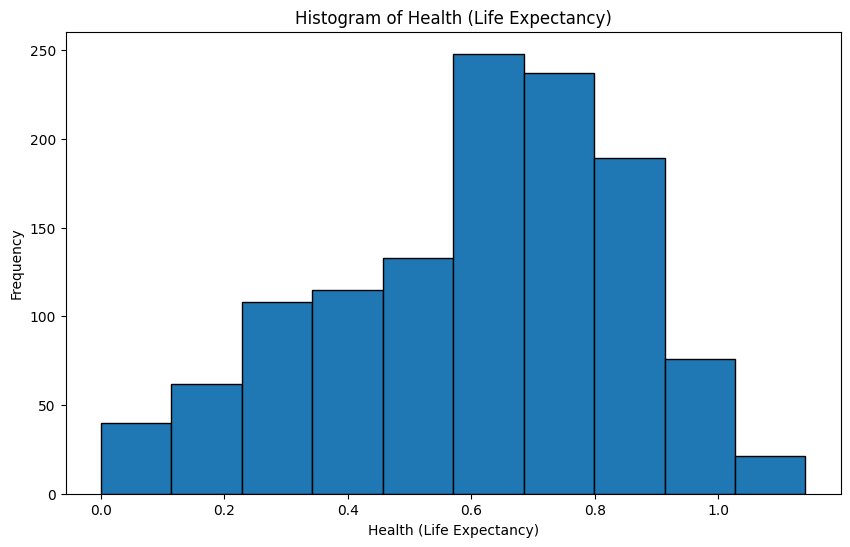

In [45]:
plot_histogram(df_cleaned, 'Health (Life Expectancy)')

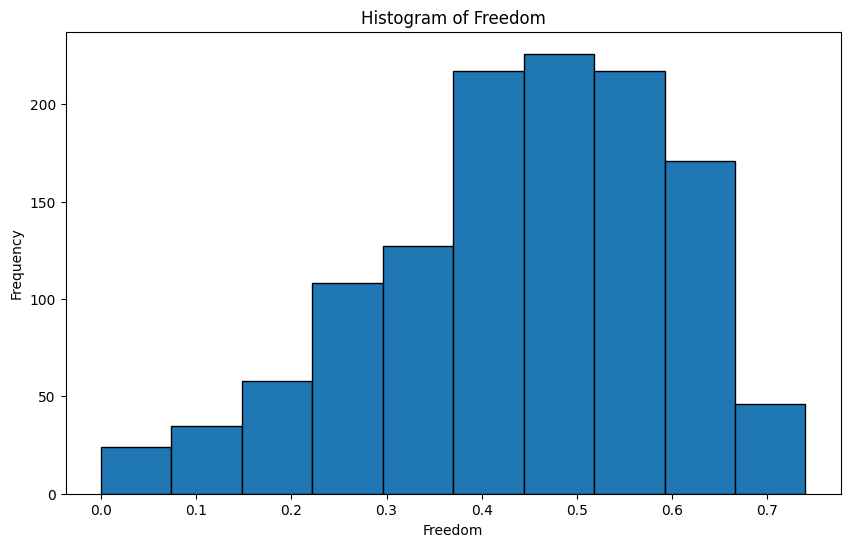

In [46]:
plot_histogram(df_cleaned, 'Freedom')

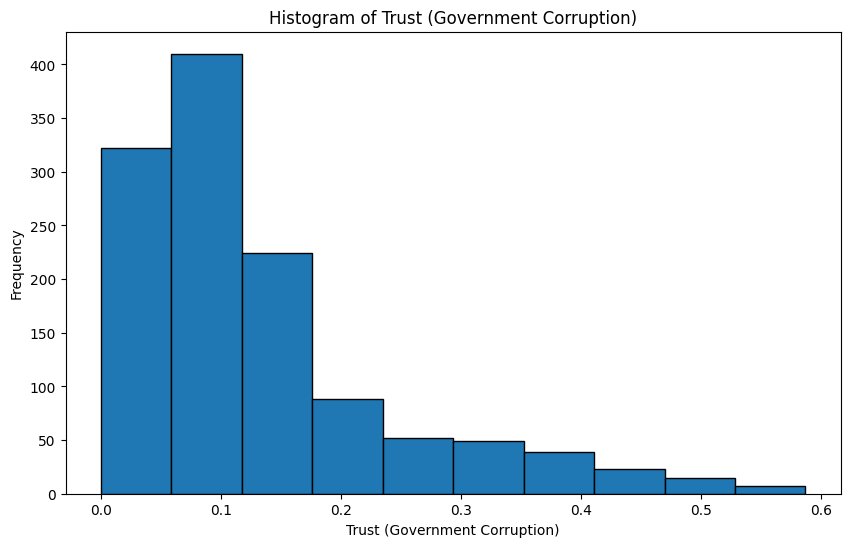

In [47]:
plot_histogram(df_cleaned, 'Trust (Government Corruption)')

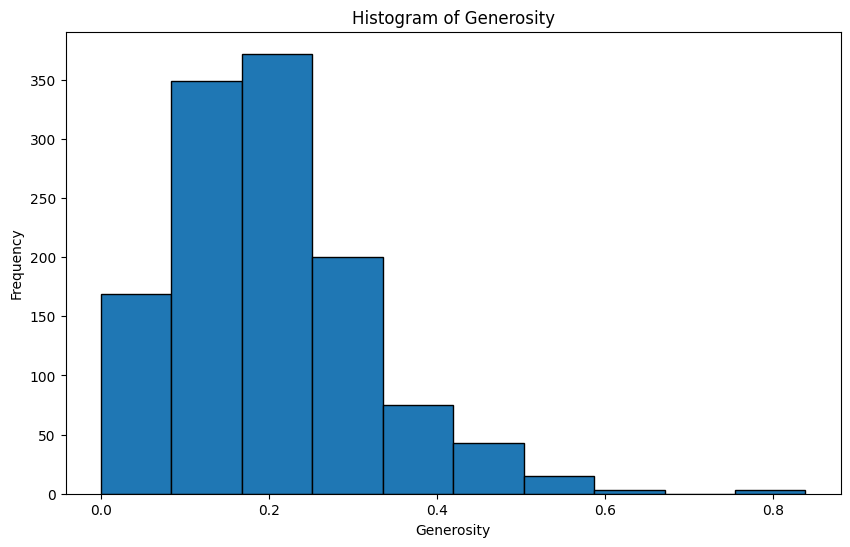

In [48]:
plot_histogram(df_cleaned, 'Generosity')

- Không có giá trị nhiễu nào ở các cột

## 3.5. Trực quan hóa dữ liệu

<b>Top 5 Quốc gia có số điểm Happniess Score trung bình cao nhất</b>

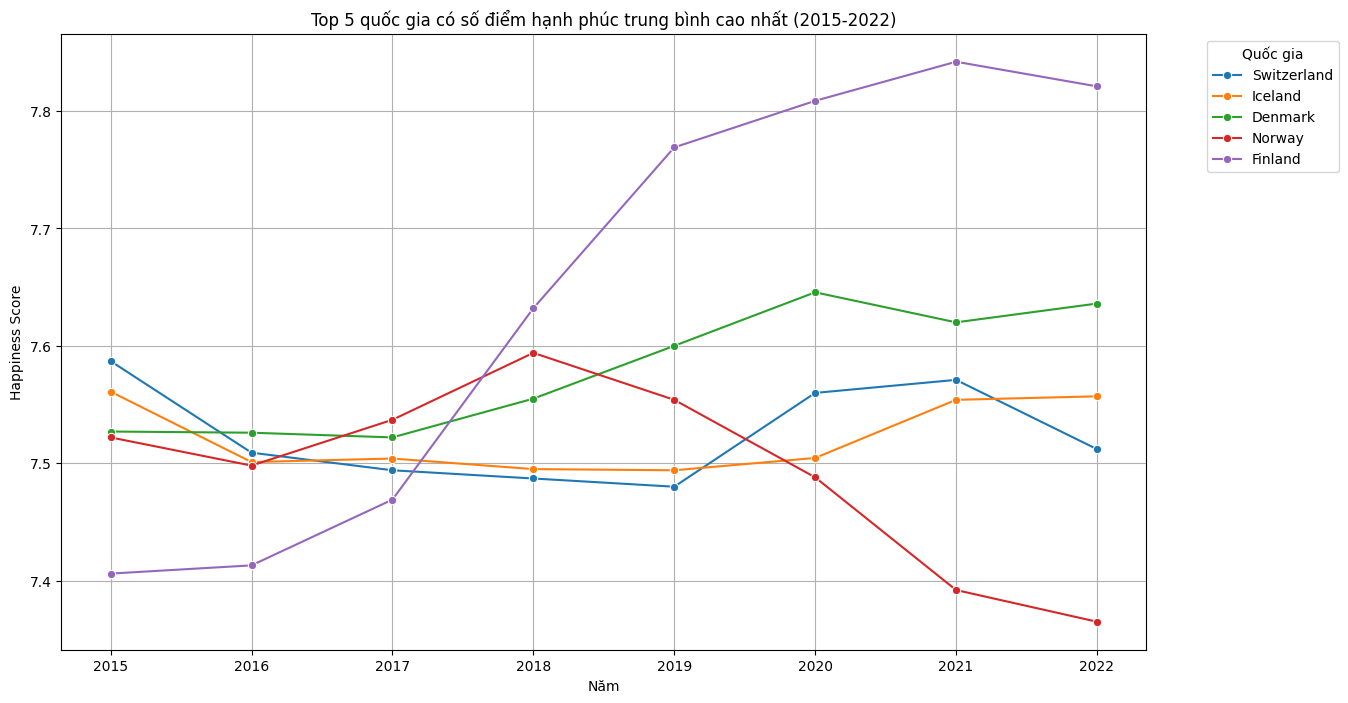

In [49]:
average_happiness = df_cleaned.groupby('Country')['Happiness Score'].mean().reset_index()

# Tìm top 5 quốc gia có điểm số trung bình cao nhất
top5_countries_highest = average_happiness.nlargest(5, 'Happiness Score')['Country']

# Lọc dữ liệu cho top 5 quốc gia
top5_data_highest = df_cleaned[df_cleaned['Country'].isin(top5_countries_highest)]

plt.figure(figsize=(14, 8))

# Vẽ biểu đồ, sử dụng Seaborn để vẽ biểu đồ đường cho từng quốc gia
sns.lineplot(data=top5_data_highest, x='year', y='Happiness Score', hue='Country', marker='o')

plt.title('Top 5 quốc gia có số điểm hạnh phúc trung bình cao nhất (2015-2022)')
plt.xlabel('Năm')
plt.ylabel('Happiness Score')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Nhận xét**:
- Các quốc gia được xếp hạng cao bao gồm Thụy Sĩ, Iceland, Đan Mạch, Na Uy và Phần Lan.
- Nhìn chung, số điểm hạnh phúc trung bình của cả 5 quốc gia đều có xu hướng tăng dần trong giai đoạn này, ngoại từ Na Uy là bắt đầu giảm mạnh từ năm 2018 trở đi và Phần Lan tăng đột biến từ năm 2017.

<b>Top 5 Quốc gia có số điểm Happniess Score trung bình thấp nhất</b>

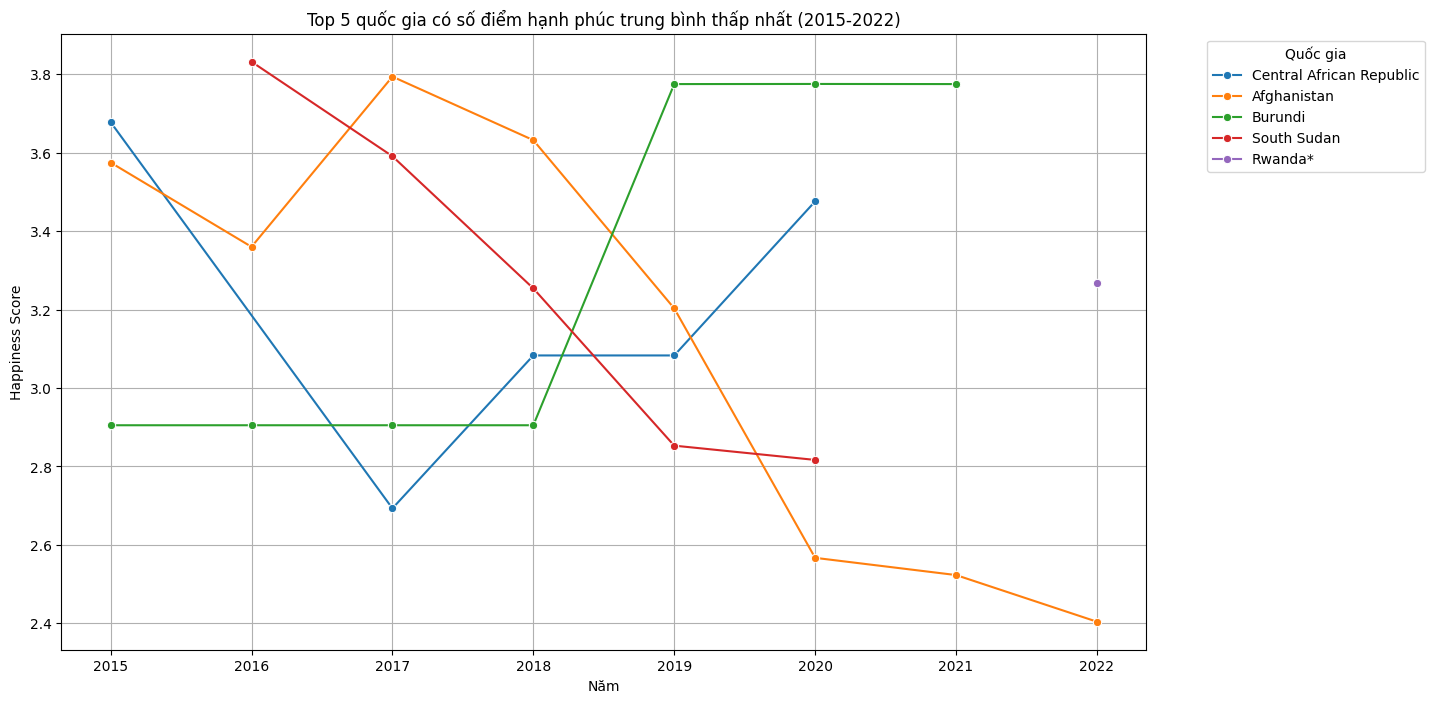

In [50]:
# Tìm top 5 quốc gia có điểm số trung bình thấp nhất
top5_countries_lowest = average_happiness.nsmallest(5, 'Happiness Score')['Country']

# Lọc dữ liệu cho top 5 quốc gia
top5_data_lowest = df_cleaned[df_cleaned['Country'].isin(top5_countries_lowest)]

plt.figure(figsize=(14, 8))

# Vẽ biểu đồ, sử dụng Seaborn để vẽ biểu đồ đường cho từng quốc gia
sns.lineplot(data=top5_data_lowest, x='year', y='Happiness Score', hue='Country', marker='o')

plt.title('Top 5 quốc gia có số điểm hạnh phúc trung bình thấp nhất (2015-2022)')
plt.xlabel('Năm')
plt.ylabel('Happiness Score')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Nhận xét**: 
- Cả 4 Quốc gia Central African Republic, Afghanistan, Burundi, South Sudan thường xuyên gặp phải các vấn đề xã hội và kinh tế, dẫn đến sự giảm điểm hạnh phúc trong nhiều năm. Tuy nhiên, một số quốc gia như Central African Republic và Burundi đã trải qua sự phục hồi tạm thời vào một số năm cụ thể.
- Tình hình hạnh phúc tại Afghanistan và South Sudan đang tiếp tục đau đớn khi mà hai quốc gia này vẫn đối mặt với những thách thức đáng lo ngại. Trong suốt giai đoạn từ 2015 đến 2022, điểm hạnh phúc của cả hai quốc gia này đều ghi nhận mức độ giảm mạnh và không có dấu hiệu hồi phục.
- Afghanistan, sau nhiều năm chiến tranh và xung đột, vẫn đứng trước những thách thức lớn về an ninh, kinh tế và xã hội. Cộng đồng quốc tế đã lâu nay cố gắng hỗ trợ quốc gia này trong việc xây dựng lại và phát triển, nhưng các rủi ro an ninh vẫn tiếp tục đe dọa sự ổn định và tiến trình phát triển. Tương tự, South Sudan cũng đang chịu đựng hậu quả nặng nề của xung đột và bất ổn chính trị kéo dài. Với việc bị ảnh hưởng bởi việc phân chia lãnh thổ và bất đồng chính trị, dân số South Sudan phải đối mặt với nguy cơ về an ninh thực sự và thiếu vắng cơ sở hạ tầng cơ bản, bao gồm cả y tế và giáo dục.

<b>Sự dao động của Happiness Score qua từng năm

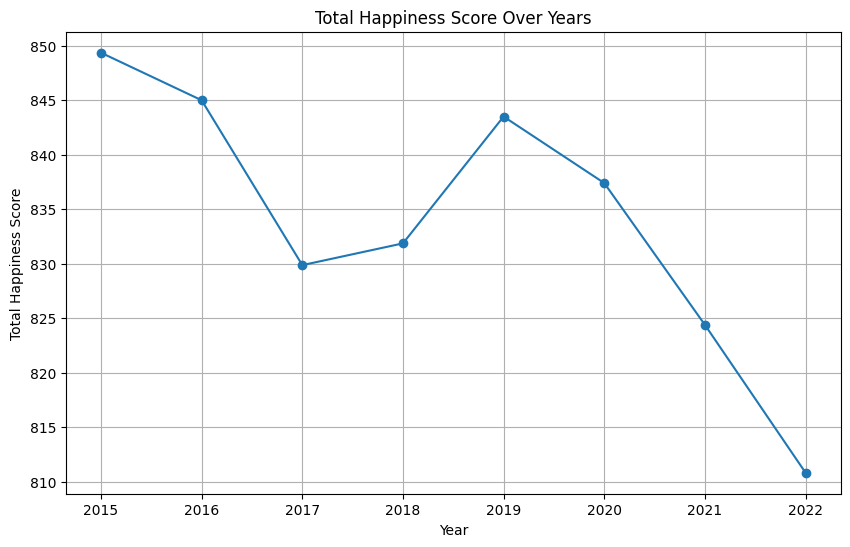

In [51]:
# Tính tổng điểm Happiness Score cho mỗi năm
total_happiness_per_year = df_cleaned.groupby('year')['Happiness Score'].sum().reset_index()

# Vẽ biểu đồ đường biểu diễn tổng điểm Happiness Score theo năm
plt.figure(figsize=(10, 6))
plt.plot(total_happiness_per_year['year'], total_happiness_per_year['Happiness Score'], marker='o')
plt.xlabel('Year')
plt.ylabel('Total Happiness Score')
plt.title('Total Happiness Score Over Years')
plt.grid(True)
plt.show()

**Nhận xét**: Bắt đầu từ 2019, số điểm có xu hướng giảm mạnh (cho đến năm 2022 lúc khảo sát), có thể là tại vì:
- Đại dịch COVID-19: Đại dịch COVID-19 bùng phát vào cuối năm 2019 và lan rộng trên toàn cầu trong năm 2020. Sự lan rộng của virus và các biện pháp phong tỏa và kiểm soát dịch bệnh đã gây ra một loạt các ảnh hưởng tiêu cực đối với nền kinh tế, sức khỏe và tâm lý của người dân. Việc phải sống trong tình hình bất ổn và lo sợ về sức khỏe và tài chính có thể đã làm giảm mức độ hạnh phúc của nhiều người.
- Tác động kinh tế: Đại dịch COVID-19 đã gây ra một số biến động lớn trong nền kinh tế toàn cầu, bao gồm sụp đổ của các ngành công nghiệp quan trọng như du lịch, giải trí và hàng không. Các biện pháp giãn cách xã hội và phong tỏa đã dẫn đến mất việc làm, giảm thu nhập và tăng tỷ lệ thất nghiệp, gây ra lo lắng và lo sợ về tương lai và ảnh hưởng đến tâm trạng và mức độ hạnh phúc của người dân.
- Tăng cường căng thẳng xã hội: Sự căng thẳng xã hội và bất ổn chính trị cũng có thể đã góp phần vào sự giảm mạnh của điểm hạnh phúc từ năm 2019. Các biểu hiện của sự căng thẳng và bất ổn có thể bao gồm các cuộc biểu tình, xung đột và bất đồng quan điểm, tất cả đều gây ra một môi trường không ổn định và lo sợ trong cộng đồng.

<b>Tỷ lệ các yếu tố ảnh hưởng đến Happiness</b>

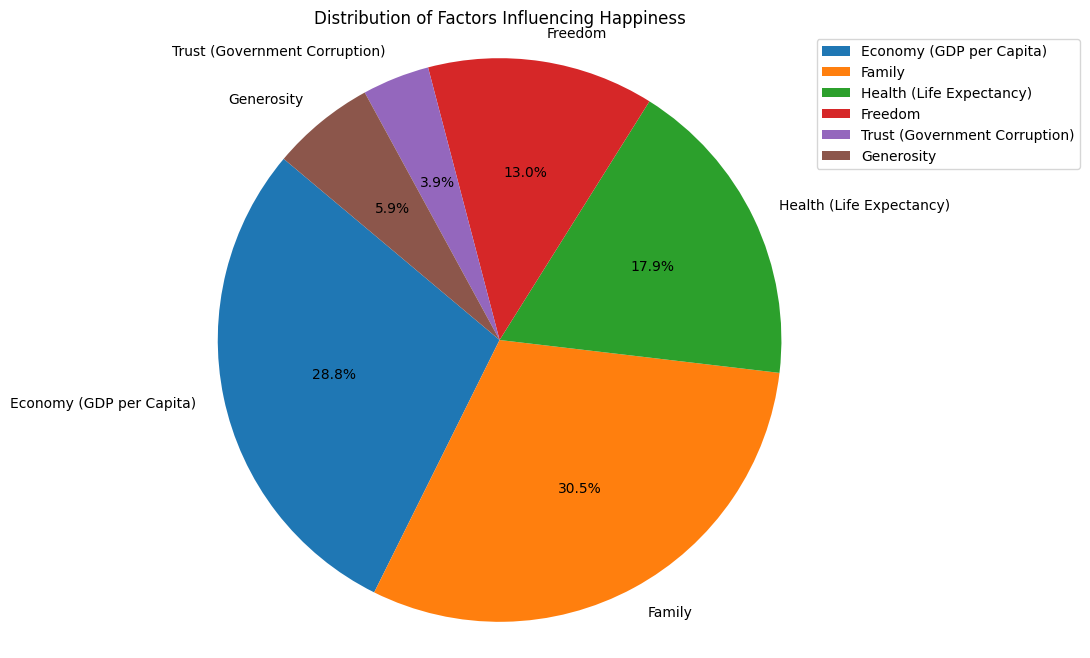

In [52]:
# Tính phần trăm của mỗi yếu tố
total_happiness = df_cleaned['Happiness Score'].sum()
percentage = df_cleaned[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']].sum() / total_happiness * 100

# Vẽ biểu đồ tròn
labels = percentage.index
sizes = percentage.values
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Factors Influencing Happiness')
plt.axis('equal')

# Tạo legend
plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Nhận xét:** Sự phân phối của các yếu tố ảnh hưởng đến Happiness Score được biểu diễn trong biểu đồ tròn cho thấy sự quan trọng của ba yếu tố chính là Family, Economy và Health đối với mức độ hạnh phúc của một quốc gia. Trong đó, Family đóng vai trò quan trọng nhất, tiếp theo là Economy và Health. Sự hài lòng trong mối quan hệ gia đình, thu nhập kinh tế và sức khỏe là những yếu tố cơ bản quyết định đến sự hạnh phúc và chất lượng cuộc sống của một quốc gia.

<b>Bản đồ thể hiện trung bình Happiness Score sau các năm khảo sát</b>

In [53]:
df_mean_happiness = df_cleaned.groupby('Country')['Happiness Score'].mean().reset_index()

data = dict(
    type = 'choropleth', 
    locations = df_mean_happiness['Country'],
    locationmode = 'country names',
    colorscale='RdYlGn',
    z = df_mean_happiness['Happiness Score'], 
    text = df_mean_happiness['Country'],
    colorbar = {'title':'Happiness Score'}
)

layout = dict(
    title = 'Geographical Visualization of Average Happiness Score (2015-2022)', 
    geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'})
)

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

**Nhận xét**:
- Dựa trên biểu đồ, các quốc gia có chỉ số Hạnh Phúc cao nhất thế giới tập trung ở Bắc Âu, bao gồm: Phần Lan, Đan Mạch, Na Uy, Iceland và Thụy Sĩ
- Các quốc gia có điểm số hạnh phúc thấp tập trung ở Châu Phi, có thể là do điều kiện thời tiết tại Châu Lục này có ảnh hưởng lớn đến sự phát triển của các Quốc gia ở đây. Ngoài ra, Ấn Độ cũng thuộc diện nhóm này, có lẽ là do sự phân hóa, cách biệt giữa tầng lớp giàu nghèo trong xã hội Ấn.
- 2 quốc gia có diện tích lớn nhất là Nga và Trung Quốc lại có chi số Hạnh Phúc trung bình.
- Châu Úc và Châu Mỹ là 2 Châu Lục có số điểm Happiness Score tốt hơn so với các Châu còn lại. Ở Châu Mỹ, các nước có điểm cao đa số đều ở phía Bắc, xung quanh Hoa Kỳ.

<b>Mối tương quan giữa các thuộc tính</b>

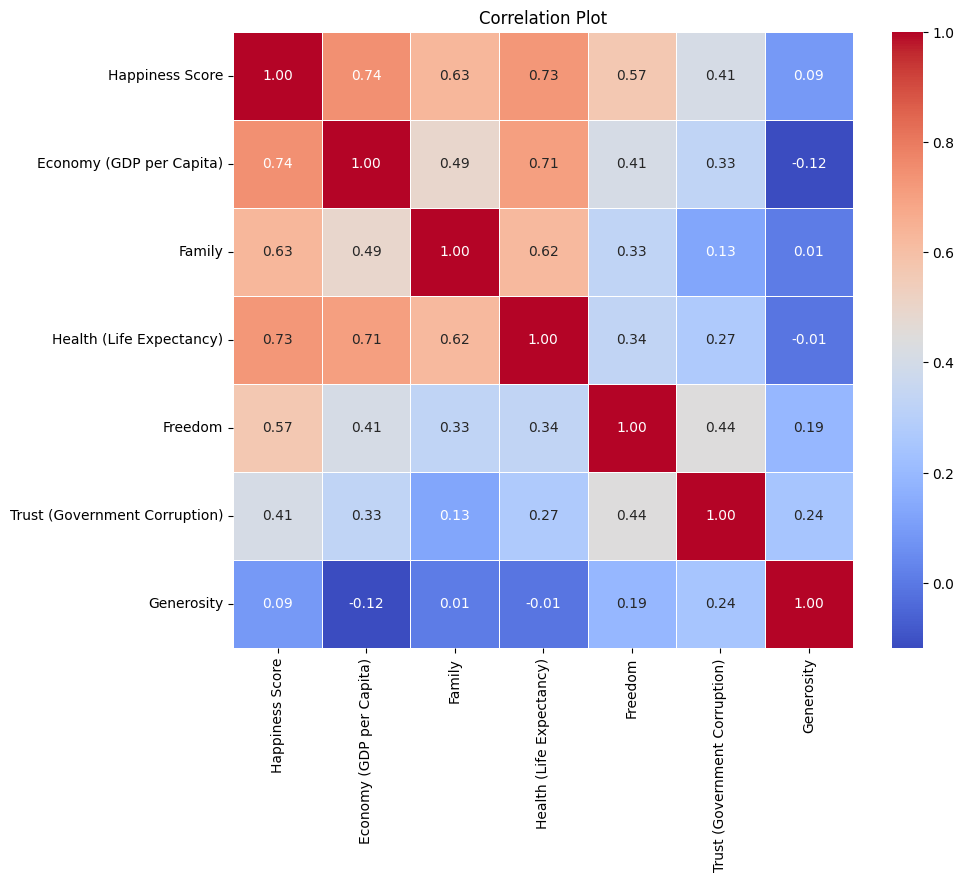

In [54]:
# Tạo ma trận tương quan
df_cor = X = df_cleaned.drop(columns=['Country', 'year'])
corr_matrix = df_cor.corr()

# Vẽ biểu đồ tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()


**Nhận xét**:
- Happiness Score có mối tương quan tích cực mạnh mẽ với Economy. Điều này có nghĩa là, các quốc gia có GDP cao hơn thường có Happiness Score cao hơn. Đây là điều dễ hiểu vì GDP cao hơn đồng nghĩa với thu nhập cao hơn, mức sống cao hơn và nhiều cơ hội hơn cho người dân.
- Happiness Score cũng có mối tương quan tích cực mạnh mẽ với Family và Health. Điều này cho thấy rằng các mối quan hệ gia đình tốt đẹp và sức khỏe tốt đóng vai trò quan trọng trong việc nâng cao hạnh phúc của con người.
- Health và Economy có mối tương quan tích cực cao, thực tế là nền kinh tế càng phát triển thì phúc lợi y tế, xã hội mà người dân có thể sử dụng càng tốt, nên chất lượng sức khỏe cũng được nâng theo.
- Generosity và Economy có mối tương quan âm nhẹ, có lẽ là ở quốc gia mà người dân có độ hào phóng cao thì sẽ có thu nhập thấp.

## 3.6. Xử lý thu giảm dữ liệu

In [55]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229 entries, 0 to 145
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        1229 non-null   object 
 1   Happiness Score                1229 non-null   float64
 2   Economy (GDP per Capita)       1229 non-null   float64
 3   Family                         1229 non-null   float64
 4   Health (Life Expectancy)       1229 non-null   float64
 5   Freedom                        1229 non-null   float64
 6   Trust (Government Corruption)  1229 non-null   float64
 7   Generosity                     1229 non-null   float64
 8   year                           1229 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 96.0+ KB


In [56]:
# Chọn loại bỏ các cột không liên quan để thực hiện PCA
X = df_cleaned.drop(columns=['Country', 'year'])

In [57]:
# Khởi tạo PCA
pca = PCA()

# Fit PCA vào dữ liệu
pca.fit(X)

# Tính tỷ lệ phương sai giải thích bởi từng thành phần chính
explained_variance_ratio = pca.explained_variance_ratio_

# Tính tỷ lệ phương sai tích lũy
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

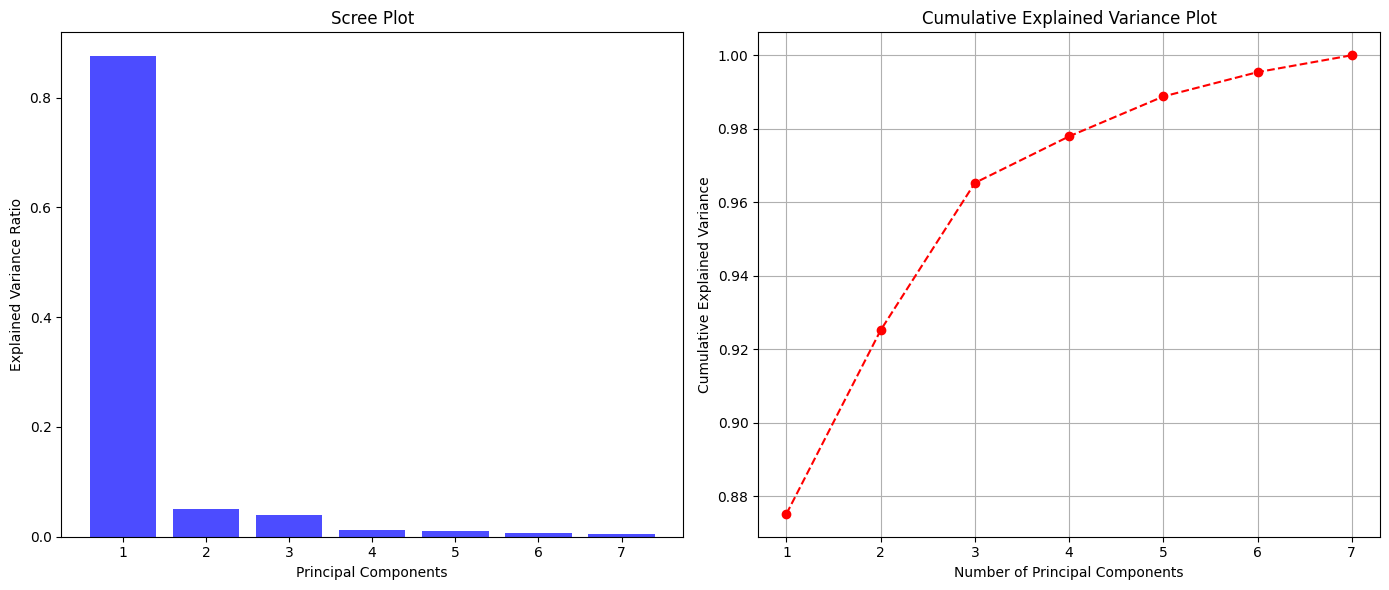

In [58]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 6))

# Biểu đồ Scree Plot
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='b')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

# Biểu đồ tỷ lệ phương sai tích lũy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

In [59]:
# Khởi tạo PCA với số thành phần chính mong muốn
pca = PCA(n_components=2)

# Fit và chuyển đổi dữ liệu
principal_components = pca.fit_transform(X)

# Xóa các dòng trùng lặp và reset lại chỉ số của DataFrame
df_cleaned_unique = df_cleaned.drop_duplicates(subset=['Country', 'year'], keep='first').reset_index(drop=True)

# Tạo DataFrame mới từ các thành phần chính
df_pca = pd.DataFrame(data=principal_components, columns=['Happiness Score_PCA', 'Economy (GDP per Capita)_PCA'])

# Ghép cột vào DataFrame PCA
df_pca[['Country', 'year',
        'Family', 'Health (Life Expectancy)', 'Freedom',
        'Trust (Government Corruption)', 'Generosity']] = df_cleaned_unique[['Country', 'year',
                                                                             'Family', 'Health (Life Expectancy)', 'Freedom',
                                                                             'Trust (Government Corruption)', 'Generosity']]

# Hiển thị DataFrame PCA
display(df_pca.head())

,Happiness Score_PCA,Economy (GDP per Capita)_PCA,Country,year,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,-2.252062,-0.256062,Switzerland,2015,1.34951,0.94143,0.66557,0.41978,0.29678
1,-2.199478,-0.337091,Iceland,2015,1.40223,0.94784,0.62877,0.14145,0.43630
2,-2.169540,-0.320642,Denmark,2015,1.36058,0.87464,0.64938,0.48357,0.34139
3,-2.196445,-0.200284,Norway,2015,1.33095,0.88521,0.66973,0.36503,0.34699
4,-2.068984,-0.296026,Canada,2015,1.32261,0.90563,0.63297,0.32957,0.45811


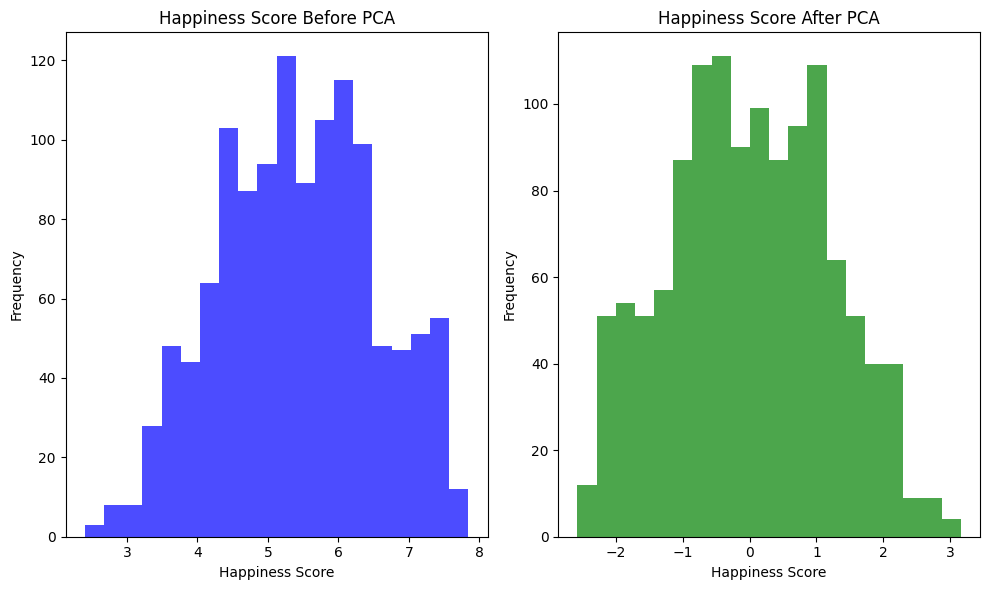

In [60]:
# Vẽ biểu đồ cho cột 'Happiness Score' trước khi PCA
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df_cleaned['Happiness Score'], bins=20, color='blue', alpha=0.7)
plt.title('Happiness Score Before PCA')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

# Vẽ biểu đồ cho cột 'Happiness Score' sau khi PCA
plt.subplot(1, 2, 2)
plt.hist(df_pca['Happiness Score_PCA'], bins=20, color='green', alpha=0.7)
plt.title('Happiness Score After PCA')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

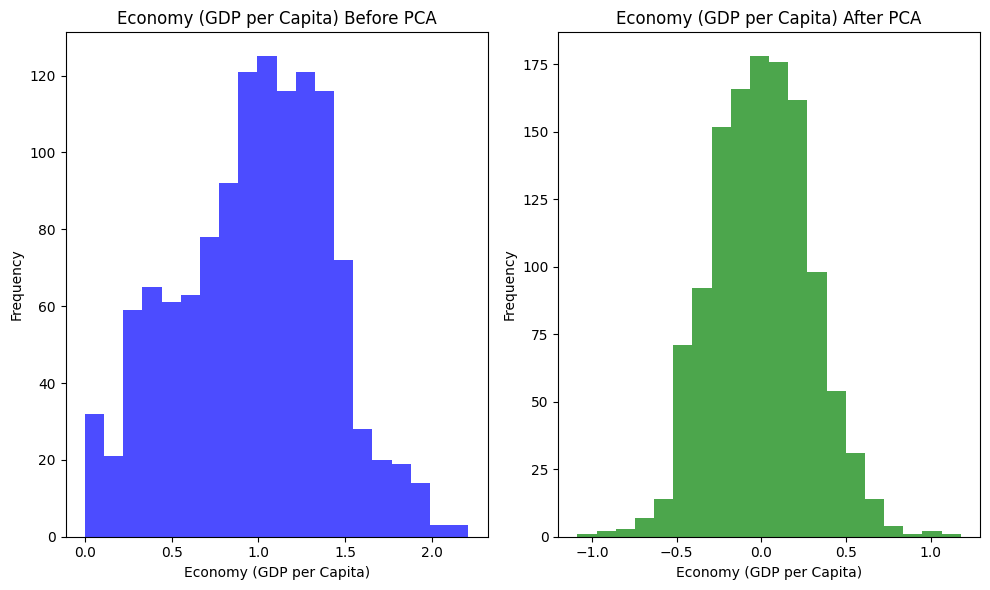

In [61]:
# Vẽ biểu đồ cho cột 'Economy (GDP per Capita)' trước khi PCA
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df_cleaned['Economy (GDP per Capita)'], bins=20, color='blue', alpha=0.7)
plt.title('Economy (GDP per Capita) Before PCA')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')

# Vẽ biểu đồ cho cột 'Economy (GDP per Capita)' sau khi PCA
plt.subplot(1, 2, 2)
plt.hist(df_pca['Economy (GDP per Capita)_PCA'], bins=20, color='green', alpha=0.7)
plt.title('Economy (GDP per Capita) After PCA')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- Sau khi thực hiện PCA với 2 thuộc tính trên, thì miền giá trị và mật độ phân bố của 2 thuộc tính cũng thay đổi

## 3.7 Biến đổi dữ liệu

- Gắn nhãn cho cột Country

In [62]:
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng LabelEncoder cho cột 'Country'
df_pca['Country'] = label_encoder.fit_transform(df_pca['Country'])

In [63]:
df_pca.head()

,Happiness Score_PCA,Economy (GDP per Capita)_PCA,Country,year,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,-2.252062,-0.256062,168,2015,1.34951,0.94143,0.66557,0.41978,0.29678
1,-2.199478,-0.337091,72,2015,1.40223,0.94784,0.62877,0.14145,0.43630
2,-2.169540,-0.320642,45,2015,1.36058,0.87464,0.64938,0.48357,0.34139
3,-2.196445,-0.200284,132,2015,1.33095,0.88521,0.66973,0.36503,0.34699
4,-2.068984,-0.296026,28,2015,1.32261,0.90563,0.63297,0.32957,0.45811


- Theo tập dữ liệu, chỉ có biến mục tiêu là Happniess Score là được tính theo thang điểm từ 0 đến 10, các biến độc lập còn lại là mức độ đóng góp của nó vào việc tính toán Happiness Score, nên ta sẽ thực hiện quy chuẩn các biến đó về cùng 1 thang điểm từ 0 đến 10 cho cùng một miền giá trị

In [64]:
def min_max_normalization(value, oldMin, oldMax, newMin, newMax):
    return (((value - oldMin)/(oldMax - oldMin)) * (newMax - newMin)) + newMin

In [65]:
df_pca['Happiness Score_PCA'] = df_pca['Happiness Score_PCA'].apply(
    lambda x: min_max_normalization(x, -3, 4, 0, 10)
)

In [66]:
df_pca['Economy (GDP per Capita)_PCA'] = df_pca['Economy (GDP per Capita)_PCA'].apply(
    lambda x: min_max_normalization(x, -2, 2, 0, 10)
)

In [67]:
df_pca['Family'] = df_pca['Family'].apply(
    lambda x: min_max_normalization(x, 0, 2, 0, 10)
)

In [68]:
df_pca['Health (Life Expectancy)'] = df_pca['Health (Life Expectancy)'].apply(
    lambda x: min_max_normalization(x, 0, 2, 0, 10)
)

In [69]:
df_pca['Freedom'] = df_pca['Freedom'].apply(
    lambda x: min_max_normalization(x, 0, 1, 0, 10)
)

In [70]:
df_pca['Trust (Government Corruption)'] = df_pca['Trust (Government Corruption)'].apply(
    lambda x: min_max_normalization(x, 0, 1, 0, 10)
)

In [71]:
df_pca['Generosity'] = df_pca['Generosity'].apply(
    lambda x: min_max_normalization(x, 0, 1, 0, 10)
)

## 3.8. Tóm tắt thống kê cho các côt số

In [72]:
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Score_PCA,1229.0,4.285714,1.716007,0.605478,3.049264,4.241870,5.591006,8.798664
Economy (GDP per Capita)_PCA,1229.0,5.000000,0.717387,2.282289,4.489657,5.003466,5.487663,7.947450
Country,1229.0,96.544345,56.858766,0.000000,48.000000,94.000000,146.000000,194.000000
year,1229.0,2018.447518,2.283610,2015.000000,2016.000000,2018.000000,2020.000000,2022.000000
Family,1229.0,5.165967,1.647891,0.000000,4.140000,5.346680,6.369250,8.220000
Health (Life Expectancy),1229.0,3.040411,1.206702,0.000000,2.195000,3.196666,3.954050,5.705000
Freedom,1229.0,4.409603,1.544125,0.000000,3.450000,4.590000,5.590000,7.400000
Trust (Government Corruption),1229.0,1.307559,1.108176,0.000000,0.560000,0.960000,1.640000,5.870000
Generosity,1229.0,2.015953,1.155677,0.000000,1.180000,1.870000,2.585383,8.380752


# 4. Xây dựng các mô hình cho bài toán hồi quy (Regression)
Chúng ta sẽ xây dựng các mô hình hồi quy để dự báo Happiness Score. Ba mô hình được lựa chọn bao gồm Feedforward Neural Network (FNN), Random Forest Regressor và K-Nearest Neighbors (KNN). Mục tiêu của chúng ta là sử dụng các mô hình này để dự đoán Happiness Score dựa trên các yếu tố ảnh hưởng.

1. **Feedforward Neural Network (FNN)**: Mạng nơ-ron truyền thẳng là một mô hình học sâu được cấu thành từ các lớp nơ-ron, trong đó thông tin chỉ di chuyển một chiều từ lớp đầu vào đến lớp đầu ra. FNN có khả năng học được các biểu diễn phức tạp của dữ liệu và khám phá các mối quan hệ phi tuyến tính giữa các biến độc lập và Happiness Score.

2. **Random Forest Regressor**: Mô hình Random Forest là một phương pháp học máy dựa trên cây quyết định, nó có khả năng xử lý các mối quan hệ phi tuyến tính và tương tác giữa các biến độc lập.

3. **K-Nearest Neighbors (KNN)**: KNN là một thuật toán học máy đơn giản dùng cho cả phân loại và hồi quy. Trong hồi quy, KNN dự đoán giá trị của một điểm dữ liệu bằng cách tính trung bình của các giá trị của những điểm láng giềng gần nhất của nó. KNN không học một mô hình tường minh mà thay vào đó "nhớ" toàn bộ dữ liệu huấn luyện và sử dụng nó để đưa ra dự đoán.

Chúng ta sẽ huấn luyện các mô hình này trên tập dữ liệu đã được tiền xử lý từ EDA và đánh giá hiệu suất của từng mô hình để chọn ra mô hình tốt nhất cho bài toán dự báo Happiness Score.

## 4.1. Sự tương quan giữa các biến

In [73]:
df_pca.dtypes

Happiness Score_PCA              float64
Economy (GDP per Capita)_PCA     float64
Country                            int32
year                               int64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

In [74]:
print("Số dòng x cột của tập dataframe hiện tại:")
display(df_pca.shape)

# Đếm số lượng dòng dữ liệu có cột bị NULL hoặc rỗng
num_rows_with_null = len(df_pca[df_pca.isnull().any(axis=1)])

print(f"Số lượng dòng dữ liệu có cột bị NULL hoặc rỗng: {num_rows_with_null}")


Số dòng x cột của tập dataframe hiện tại:


(1229, 9)

Số lượng dòng dữ liệu có cột bị NULL hoặc rỗng: 0


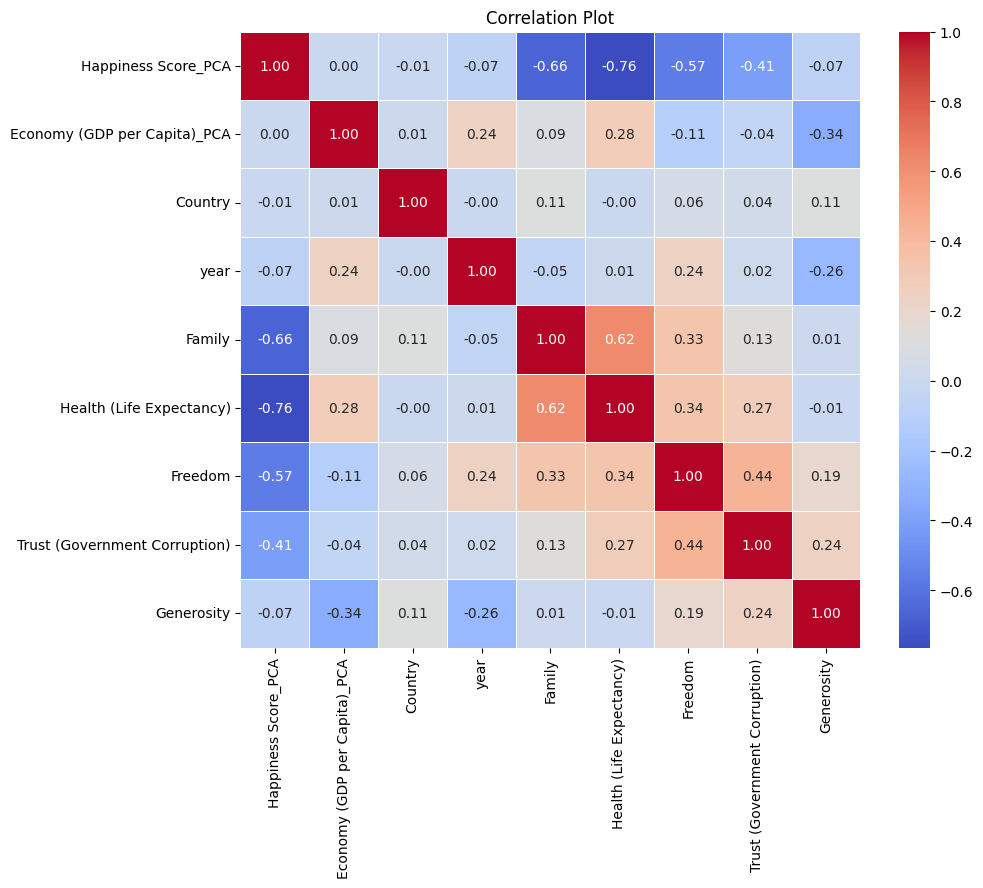

In [75]:
# Tạo ma trận tương quan
corr_matrix = df_pca.corr()

# Vẽ biểu đồ tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()


- Có sự tương quan khá cao giữa Family và Health, ta có thể loại bỏ 1 trong 2 cột để tránh hiện tượng đa cộng tuyến khi xây dựng mô hình

In [76]:
df_pca = df_pca.drop(columns=['Family'])

In [77]:
df_pca.dtypes

Happiness Score_PCA              float64
Economy (GDP per Capita)_PCA     float64
Country                            int32
year                               int64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

## 4.2. Chia dữ liệu thành tập Train và Test

In [78]:
# Chia dữ liệu thành features (X) và target (y)
X = df_pca.drop('Happiness Score_PCA', axis=1)
y = df_pca['Happiness Score_PCA']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.3. FNN (Feedforward Neural Network) Model

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# Xây dựng mô hình với learning rate tùy chỉnh
custom_optimizer = Adam(learning_rate=0.001)

# Xây dựng mô hình với các điều chỉnh khác
model = keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  
    Dense(64, activation='relu'),
    Dropout(0.2),  
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1)
])


f:\Download_Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [81]:
# Biên dịch mô hình với tối ưu hóa tùy chỉnh
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train_scaled, y_train, epochs=200, verbose=1, batch_size=32, validation_split=0.2)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 19.0709 - val_loss: 8.1197
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0813 - val_loss: 1.8056
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5794 - val_loss: 1.6400
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7393 - val_loss: 1.6983
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6936 - val_loss: 1.4076
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6268 - val_loss: 1.2834
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4733 - val_loss: 1.3094
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5734 - val_loss: 1.7359
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6230 - val_loss: 1.4903
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4656 - val_loss: 1.3751
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9120 - val_loss: 1.0905
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2

In [82]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Tính toán các độ đo đánh giá
mse_fnn = mean_squared_error(y_test, y_pred)
rmse_fnn = np.sqrt(mse_fnn)
mae_fnn = mean_absolute_error(y_test, y_pred)
r2_fnn = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse_fnn)
print('Root Mean Squared Error (RMSE):', rmse_fnn)
print('Mean Absolute Error (MAE):', mae_fnn)
print('R-squared (R2):', r2_fnn)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error (MSE): 0.40614550555757234
Root Mean Squared Error (RMSE): 0.6372954617424891
Mean Absolute Error (MAE): 0.49017895990393134
R-squared (R2): 0.857061621876068


## 4.4. Random Forest Regressor Model

In [83]:
# Khởi tạo và huấn luyện mô hình Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

In [84]:
rf_regressor.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_regressor.predict(X_test)

In [85]:
# Đánh giá hiệu suất của mô hình
mse_rfr = mean_squared_error(y_test, y_pred)
rmse_rfr = np.sqrt(mse_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred)
r2_rfr = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_rfr)
print("Root Mean Squared Error (RMSE):", rmse_rfr)
print("Mean Absolute Error (MAE):", mae_rfr)
print("R-squared (R²):", r2_rfr)

Mean Squared Error (MSE): 0.43149607217292324
Root Mean Squared Error (RMSE): 0.656883606259833
Mean Absolute Error (MAE): 0.5093999269874105
R-squared (R²): 0.8481397728664468


## 4.5. K - Nearest Neighbors (KNN) Model

In [86]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [87]:
# Bước 3: Dự đoán trên tập kiểm tra và đánh giá mô hình
y_pred = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)

print(f"MSE: {mse_knn}")
print(f"MAE: {mae_knn}")
print(f"R-squared: {r2_knn}")

MSE: 0.6411166812016432
MAE: 0.6022857382906284
R-squared: 0.7743661388709605


- Kết quả của mô hình khá thấp (dưới 85%), tiến hành tinh chỉnh lại

In [88]:
# Thiết lập các giá trị cần thử cho n_neighbors
param_grid = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

In [89]:
# Tạo mô hình KNN
knn_model = KNeighborsRegressor()

In [90]:
# Tìm kiếm siêu tham số tốt nhất bằng GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [91]:
# In ra siêu tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [92]:
# Dự đoán trên tập kiểm tra bằng mô hình đã tinh chỉnh
y_pred_tuned = grid_search.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print("MSE after tuning:", mse_tuned)


MSE after tuning: 0.13908032639482226


In [93]:
# Tạo mô hình KNN với các tham số tốt nhất
best_knn_model = KNeighborsRegressor(algorithm="auto", metric= "manhattan", n_neighbors = 1, weights = 'uniform')

In [94]:
best_knn_model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=1)

In [95]:
# Bước 3: Dự đoán trên tập kiểm tra và đánh giá mô hình
y_pred = best_knn_model.predict(X_test)
# Đánh giá hiệu suất của mô hình
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("Mean Absolute Error (MAE):", mae_knn)
print("R-squared (R²):", r2_knn)

Mean Squared Error (MSE): 0.13908032639482226
Root Mean Squared Error (RMSE): 0.37293474817295086
Mean Absolute Error (MAE): 0.24462741169586005
R-squared (R²): 0.9510522312526122


## 4.6. Lựa chọn model tốt nhất cho bài toán

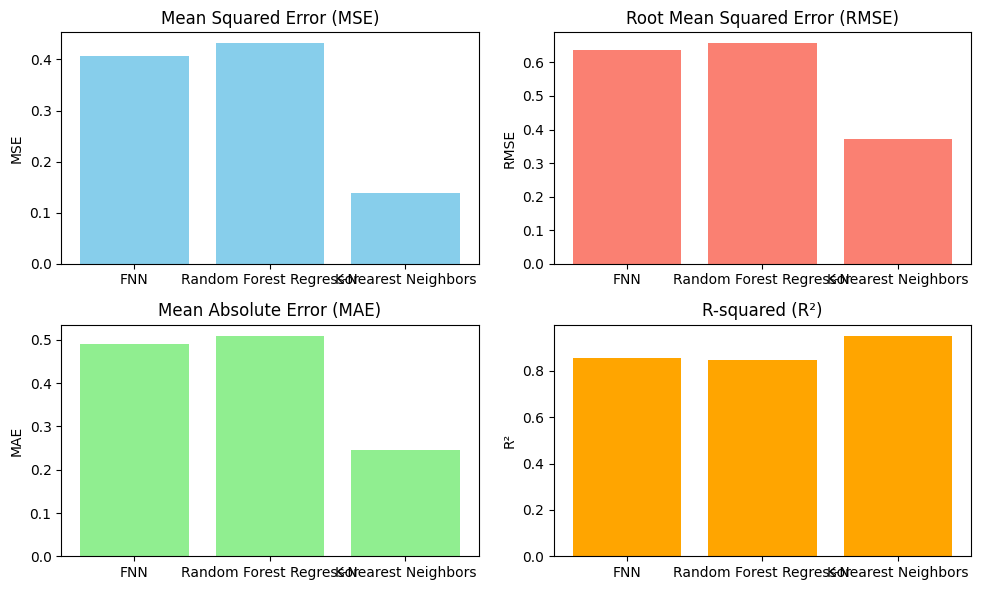

In [96]:
# Chỉ số đánh giá của ba mô hình
models = ['FNN', 'Random Forest Regressor', 'K-Nearest Neighbors']
mse_scores = [mse_fnn, mse_rfr, mse_knn]
rmse_scores = [rmse_fnn, rmse_rfr, rmse_knn]
mae_scores = [mae_fnn, mae_rfr, mae_knn]
r2_scores = [r2_fnn, r2_rfr, r2_knn]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, mse_scores, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(2, 2, 2)
plt.bar(models, rmse_scores, color='salmon')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')

plt.subplot(2, 2, 3)
plt.bar(models, mae_scores, color='lightgreen')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.subplot(2, 2, 4)
plt.bar(models, r2_scores, color='orange')
plt.title('R-squared (R²)')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

- Dựa vào các kết quả, K - Nearest Neighbors (KNN) là model tốt nhất

In [97]:
# Convert the KNN model to ONNX format
initial_type = [('float_input', FloatTensorType([None, X.shape[1]]))]
onnx_model = convert_sklearn(best_knn_model, initial_types=initial_type)

# Save the ONNX model to a file
onnx_file_path = "best-model-regression.onnx"
with open(onnx_file_path, "wb") as f:
    f.write(onnx_model.SerializeToString())